From the Forbes Global 2000 list updated on May 2013. Weighs sales, profits, assets and market value equally so companies can be ranked by size. Figures for all companies are in US dollars. Extracted only US companies from the 2000 company list

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('USA_largest_companies.csv')

data.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion)
0,3,JPMorgan Chase,108.2,21.3,2359.1,191.4
1,4,General Electric,147.4,13.6,685.3,243.7
2,5,Exxon Mobil,420.7,44.9,333.8,400.4
3,9,Berkshire Hathaway,162.5,14.8,427.5,252.8
4,12,Wells Fargo,91.2,18.9,1423.0,201.3


In [4]:
# Making column labels neat

data.columns = ['Global Rank', 'Company', 'Sales',
       'Profits', 'Assets',
       'Market Value']

### Global Rankings of US Companies

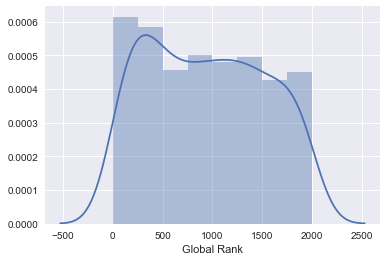

In [75]:
# Distribution of Global Rankings of US Companies

sns.distplot(data['Global Rank'])

It's spread over pretty evenly but the distribution is a bit unimodal at the 0~500 rank bin. Let's examine this with more granular bins

In [69]:
data['Global Rank Bin'] = pd.cut(data['Global Rank'], 20, include_lowest =True)

In [71]:
data.groupby('Global Rank Bin').size()

Global Rank Bin
(1.003, 102.8]      33
(102.8, 202.6]      34
(202.6, 302.4]      32
(302.4, 402.2]      35
(402.2, 502.0]      26
(502.0, 601.8]      27
(601.8, 701.6]      21
(701.6, 801.4]      27
(801.4, 901.2]      28
(901.2, 1001.0]     25
(1001.0, 1100.8]    27
(1100.8, 1200.6]    25
(1200.6, 1300.4]    25
(1300.4, 1400.2]    28
(1400.2, 1500.0]    27
(1500.0, 1599.8]    20
(1599.8, 1699.6]    23
(1699.6, 1799.4]    24
(1799.4, 1899.2]    21
(1899.2, 1999.0]    27
dtype: int64

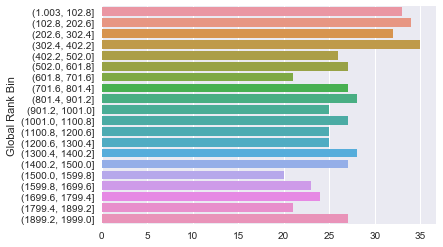

In [73]:
sns.barplot(data.groupby('Global Rank Bin').size().values, data.groupby('Global Rank Bin').size().index, orient='h')

In [80]:
# Number of US companies in 1~300 rank / Total Number of US companies included in Forbes2000

data.groupby('Global Rank Bin').size().values[:3].sum() /data.groupby('Global Rank Bin').size().values.sum() 

0.18504672897196262

A more granular observation of the distribution with smaller sized bins suggests similar things. The distribution is overall even but we can see that the top 3 bin with the biggest number of companies are the first three bins from 1st place to 302nd place. More specifically, about 18% of US corporations that were included in Forbes2000 ranked within 300th place. That's impressive.

### Looking at Sales and Profits

In [15]:
top10_sales = data.sort_values('Sales',ascending=False).head(10).Company.values.tolist()
top10_profits = data.sort_values('Profits', ascending=False).head(10).Company.values.tolist()

In [19]:
top10_df = pd.DataFrame([top10_sales,top10_profits], index=['Top 10 Sales', 'Top 10 Profits'])

In [20]:
top10_df

,0,1,2,3,4,5,6,7,8,9
Top 10 Sales,Wal-Mart Stores,Exxon Mobil,Chevron,Phillips 66,Apple,Berkshire Hathaway,General Motors,General Electric,Valero Energy,Ford Motor
Top 10 Profits,Exxon Mobil,Apple,Chevron,JPMorgan Chase,Wells Fargo,Wal-Mart Stores,IBM,Microsoft,Berkshire Hathaway,Pfizer


Top 10 Sales list and Top 10 Profits list look quite different. Wal-Mart had the biggest sales but went down to 6th place for profits. Companies like JP Morgan Chase, Wells Fargo, Microsoft and Pfizer weren't included in the top 10 list for sales but were included for the top 10 profits list. What's up with this phenomenon? This means just having great sales doesn't always lead to greater profits. Profits = Revenue - Costs, so finding the right amount of sales that maximize revenue but minimize costs is important for companies!

### Assets and Market Value

In [56]:
top10_assets = data.sort_values('Assets',ascending=False).head(10).Company.values.tolist()
top10_marketvalue = data.sort_values('Market Value',ascending=False).head(10).Company.values.tolist()
top10_df = pd.DataFrame([top10_sales,top10_profits, top10_assets, top10_marketvalue],
                        index=['Top 10 Sales', 'Top 10 Profits',
                               'Top 10 Assets', 'Top 10 Market Value'])

top10_df

,0,1,2,3,4,5,6,7,8,9
Top 10 Sales,Wal-Mart Stores,Exxon Mobil,Chevron,Phillips 66,Apple,Berkshire Hathaway,General Motors,General Electric,Valero Energy,Ford Motor
Top 10 Profits,Exxon Mobil,Apple,Chevron,JPMorgan Chase,Wells Fargo,Wal-Mart Stores,IBM,Microsoft,Berkshire Hathaway,Pfizer
Top 10 Assets,Fannie Mae,JPMorgan Chase,Bank of America,Freddie Mac,Citigroup,Wells Fargo,Goldman Sachs Group,MetLife,Morgan Stanley,Prudential Financial
Top 10 Market Value,Apple,Exxon Mobil,Google,Berkshire Hathaway,General Electric,Wal-Mart Stores,IBM,Microsoft,Chevron,Johnson & Johnson


### Relationship between Variables

In [51]:
# Correlation between different metrics

data[['Sales','Profits','Assets','Cost','Market Value']].corr()

,Sales,Profits,Assets,Cost,Market Value
Sales,1.000000,0.693255,0.351798,0.997009,0.691276
Profits,0.693255,1.000000,0.364138,0.635478,0.881346
Assets,0.351798,0.364138,1.000000,0.337849,0.300769
Cost,0.997009,0.635478,0.337849,1.000000,0.646084
Market Value,0.691276,0.881346,0.300769,0.646084,1.000000


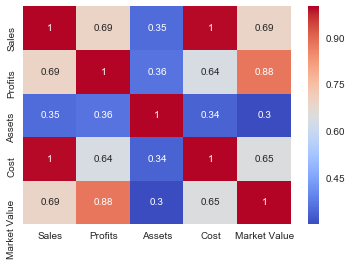

In [57]:
sns.heatmap(data[['Sales','Profits','Assets','Cost','Market Value']].corr(), cmap='coolwarm', annot=True)

- Sales and Cost have very strong correlation with value close to 1. This is natural because as you increase sales, you need to produce more which means more cost is incurred
- Sales have relatively strong correlation with profits and market value. In general, the more sales you have, the higher your profits and market value become
- Market Value & Profits is the 2nd to highest correlation pair. The more profits a  company produces, the its value is evaluated higher in the market.
- Assets have relatively weaker correlation with the rest of the metrics. This is probably because calculating assets(the sum of Liabilities and Shareholder Equity) do not involve sales, profits or market value and thus less related.

All these observations correspond to our common knowledge that companies that are big with high sales and with higher profits tend to be evaluated higher in the market